In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## MetaData

In [ ]:
cali_housing = fetch_california_housing(as_frame=True)
print(cali_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
cali_df = cali_housing.frame
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
cali_housing.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Scaling the data

In [ ]:
X = pd.DataFrame(fetch_california_housing().data)
y = pd.DataFrame(fetch_california_housing().target)

In [ ]:
scaler = MinMaxScaler()
cali_scaled = scaler.fit_transform(X, y)

In [ ]:
print(cali_scaled)

[[0.53966842 0.78431373 0.0435123  ... 0.00149943 0.5674814  0.21115538]
 [0.53802706 0.39215686 0.03822395 ... 0.00114074 0.565356   0.21215139]
 [0.46602805 1.         0.05275646 ... 0.00169796 0.5642933  0.21015936]
 ...
 [0.08276438 0.31372549 0.03090386 ... 0.0013144  0.73219979 0.31175299]
 [0.09429525 0.33333333 0.03178269 ... 0.0011515  0.73219979 0.30179283]
 [0.13025338 0.29411765 0.03125246 ... 0.00154886 0.72582359 0.30976096]]


### Splitting the data

In [ ]:
X = cali_scaled[:,0:8]
y = cali_scaled[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model 1

In [ ]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.InputLayer(input_shape=8, name="inputLayer")) 
model1.add(tf.keras.layers.Dense(30, activation="relu", name="HiddenLayer1"))
model1.add(tf.keras.layers.Dense(1, activation="linear", name="outputLayer"))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 30)                270       
                                                                 
 outputLayer (Dense)         (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss="mean_squared_error", optimizer="adam", metrics=[tf.keras.metrics.MeanSquaredError()])
history1 = model1.fit(X_train, y_train, batch_size = 32, epochs=20, validation_split=0.30)
model1.evaluate(X_test, y_test, verbose=1)

Epoch 1/20
317/317 [==============================] - 4s 4ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 9.6403e-04 - val_mean_squared_error: 9.6403e-04
Epoch 2/20
317/317 [==============================] - 1s 3ms/step - loss: 3.8414e-04 - mean_squared_error: 3.8414e-04 - val_loss: 1.9771e-04 - val_mean_squared_error: 1.9771e-04
Epoch 3/20
317/317 [==============================] - 1s 3ms/step - loss: 1.2960e-04 - mean_squared_error: 1.2960e-04 - val_loss: 9.8151e-05 - val_mean_squared_error: 9.8151e-05
Epoch 4/20
317/317 [==============================] - 1s 3ms/step - loss: 7.3297e-05 - mean_squared_error: 7.3297e-05 - val_loss: 5.9574e-05 - val_mean_squared_error: 5.9574e-05
Epoch 5/20
317/317 [==============================] - 1s 3ms/step - loss: 4.5887e-05 - mean_squared_error: 4.5887e-05 - val_loss: 3.6735e-05 - val_mean_squared_error: 3.6735e-05
Epoch 6/20
317/317 [==============================] - 1s 3ms/step - loss: 2.9972e-05 - mean_squared_error: 2.9972e-05 

[1.258302745554829e-06, 1.258302745554829e-06]

<function matplotlib.pyplot.show(*args, **kw)>

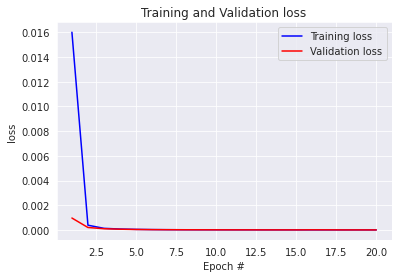

In [ ]:
sns.set_style("darkgrid")
#get the details form the history object
acc = history1.history['mean_squared_error']
val_acc = history1.history['val_mean_squared_error']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show

#### The loss is quite low for a shallow neural network after scaling the data.
#### There is pretty much no overfitting for a small dataset like this one.
#### Without scaling the MSE is higher because the computation is expensive.
------

# Model 2

#### Building the model

In [ ]:
input1 = tf.keras.layers.Input(shape=(5))
input2 = tf.keras.layers.Input(shape=(6))
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input2)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.Concatenate()([input1, hidden2])
output = tf.keras.layers.Dense(1, activation="linear")(concat)

model2 = tf.keras.Model(inputs=[input1, input2], outputs=[output])
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [ ]:
model2.compile(loss="mean_squared_error", optimizer="adam", metrics=[tf.keras.metrics.MeanSquaredError()])
history2 = model2.fit((X_train[:,0:5], X_train[:,2:8]), y_train, batch_size = 32, epochs=20, validation_split=0.30)
model2.evaluate((X_test[:,0:5],X_test[:,2:8]), y_test, verbose=1)

Epoch 1/20
317/317 [==============================] - 2s 4ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 2/20
317/317 [==============================] - 1s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 6.8981e-04 - val_mean_squared_error: 6.8981e-04
Epoch 3/20
317/317 [==============================] - 1s 4ms/step - loss: 3.6385e-04 - mean_squared_error: 3.6385e-04 - val_loss: 1.8543e-04 - val_mean_squared_error: 1.8543e-04
Epoch 4/20
317/317 [==============================] - 1s 3ms/step - loss: 1.1843e-04 - mean_squared_error: 1.1843e-04 - val_loss: 7.3170e-05 - val_mean_squared_error: 7.3170e-05
Epoch 5/20
317/317 [==============================] - 1s 4ms/step - loss: 5.0311e-05 - mean_squared_error: 5.0311e-05 - val_loss: 5.5387e-05 - val_mean_squared_error: 5.5387e-05
Epoch 6/20
317/317 [==============================] - 1s 3ms/step - loss: 3.0681e-05 - mean_squared_error: 3.0681e-05 - val_loss: 2.78

[1.15897171326651e-06, 1.15897171326651e-06]

<function matplotlib.pyplot.show(*args, **kw)>

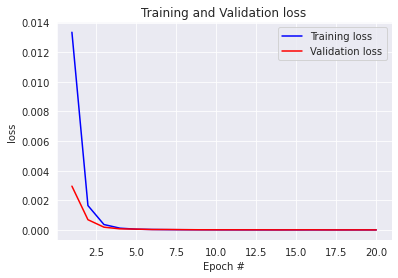

In [ ]:
sns.set_style("darkgrid")
#get the details form the history object
acc = history2.history['mean_squared_error']
val_acc = history2.history['val_mean_squared_error']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show

#### The wide and deep network has a higher loss compared to the shallow network but both models have a pretty low loss and MSE.
#### Even in the wide and deep network there is no overfitting.